In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Reading the dataset**

In [ ]:
df=pd.read_csv('/content/bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
df_copy=df.copy()

**EDA**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [ ]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
# # converting objects to numericals
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['job']=encoder.fit_transform(df['job'])
df['marital']=encoder.fit_transform(df['marital'])
df['education']=encoder.fit_transform(df['education'])
df['default']=encoder.fit_transform(df['default'])
df['housing']=encoder.fit_transform(df['housing'])
df['loan']=encoder.fit_transform(df['loan'])
df['contact']=encoder.fit_transform(df['contact'])
df['month']=encoder.fit_transform(df['month'])
df['poutcome']=encoder.fit_transform(df['poutcome'])
df['y']=encoder.fit_transform(df['y'])

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


**Feature Engineering**

In [ ]:
x=df.drop(['y'],axis=1)
y=df['y']

In [ ]:
from sklearn.preprocessing import StandardScaler
sScaler=StandardScaler()

In [ ]:
reScalex=sScaler.fit_transform(x)
reScalex

array([[-1.05626965,  1.71680374, -0.24642938, ..., -0.4072183 ,
        -0.32041282,  0.44441328],
       [-0.77258281,  0.79524562, -0.24642938, ...,  2.98904408,
         2.04173372, -2.57996071],
       [-0.58345826, -0.12631251,  1.42139579, ...,  2.89914302,
         0.27012381, -2.57996071],
       ...,
       [ 1.49691189,  1.4096177 , -0.24642938, ..., -0.4072183 ,
        -0.32041282,  0.44441328],
       [-1.24539421, -1.04787063, -0.24642938, ...,  1.71045119,
         1.45119709, -1.57183605],
       [ 0.26760226, -0.74068459,  1.42139579, ...,  2.09003345,
         3.81334363, -1.57183605]])

In [ ]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

In [ ]:
f_regression(x,y)

(array([9.20707070e+00, 3.39543524e+00, 1.02269225e+00, 8.36596827e+00,
        7.66832180e-03, 1.44922234e+00, 5.00706834e+01, 2.25837165e+01,
        8.21193103e+01, 5.71419411e-01, 7.58425183e+00, 8.66505760e+02,
        1.69599922e+01, 4.94953804e+01, 6.24091442e+01, 3.10680609e+01]),
 array([2.42453582e-003, 6.54425697e-002, 3.11935394e-001, 3.84138956e-003,
        9.30223158e-001, 2.28715830e-001, 1.71129668e-012, 2.07428459e-006,
        1.86884354e-019, 4.49734832e-001, 5.91159014e-003, 2.15044490e-174,
        3.88579357e-005, 2.28707125e-012, 3.47797069e-015, 2.63628428e-008]))

In [ ]:
fs=SelectKBest(score_func=f_regression, k='all').fit(x,y)
x_new=fs.transform(x)

Feature 0: 9.207071
Feature 1: 3.395435
Feature 2: 1.022692
Feature 3: 8.365968
Feature 4: 0.007668
Feature 5: 1.449222
Feature 6: 50.070683
Feature 7: 22.583716
Feature 8: 82.119310
Feature 9: 0.571419
Feature 10: 7.584252
Feature 11: 866.505760
Feature 12: 16.959992
Feature 13: 49.495380
Feature 14: 62.409144
Feature 15: 31.068061


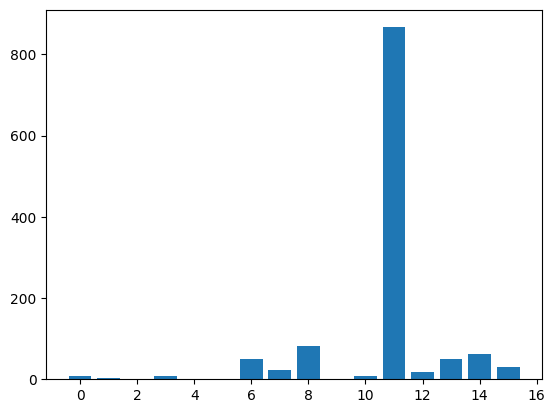

In [ ]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plotting the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

**Model fitting and performance evaluation**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
acc = accuracy_score(y_test, y_pred)
cls_rt=classification_report(y_test,y_pred)
cnf_mtx=confusion_matrix(y_test,y_pred)
print("accuracy=",acc)

accuracy= 0.9104972375690608


In [ ]:
print("classification report:\n",cls_rt)

classification report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       812
           1       0.65      0.28      0.39        93

    accuracy                           0.91       905
   macro avg       0.79      0.63      0.67       905
weighted avg       0.89      0.91      0.89       905



In [ ]:
print("confusion matrix:\n",cnf_mtx)

confusion matrix:
 [[798  14]
 [ 67  26]]


**A function that takes as arguments: a model, train data, test data and returns the model's predictions on the test data**

In [ ]:
def get_predictions(model,x_train,y_train,x_test):
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  return y_pred

In [ ]:
model=RandomForestClassifier()
predictions=get_predictions(model,x_train,y_train,x_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

**All necessary visualizations**

<Axes: xlabel='y', ylabel='count'>

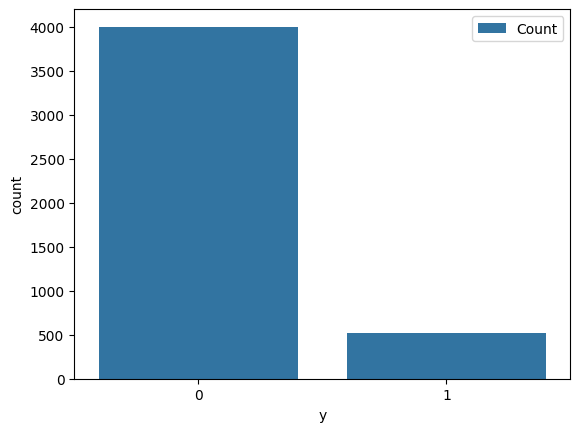

In [ ]:
# count plot
sns.countplot(x='y',data=df,label='Count')

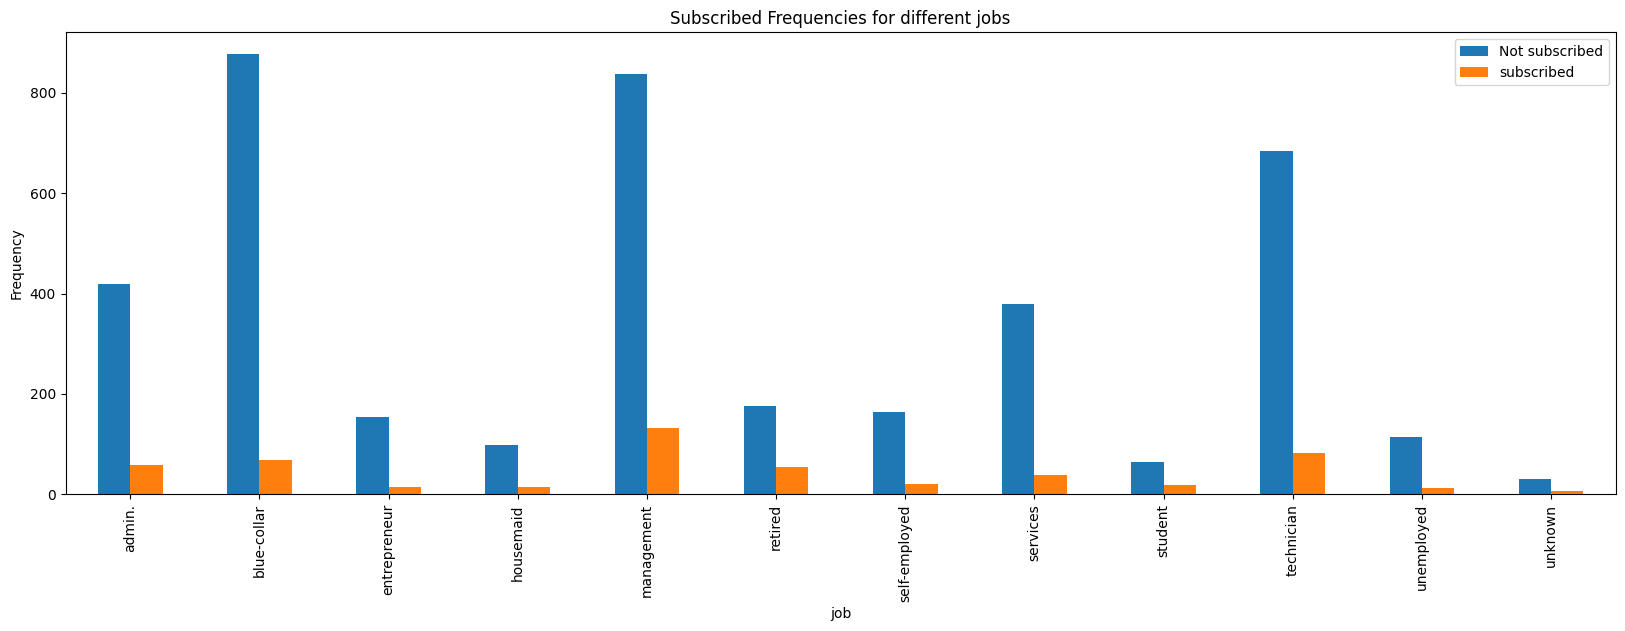

In [ ]:
# crosstab-job
ct_job=pd.crosstab(df_copy['job'],df_copy['y'])
ct_job.plot(kind="bar",figsize=(20,6))
plt.title('Subscribed Frequencies for different jobs')
plt.legend(["Not subscribed","subscribed"])
plt.xlabel('job')
plt.ylabel('Frequency')
plt.show()

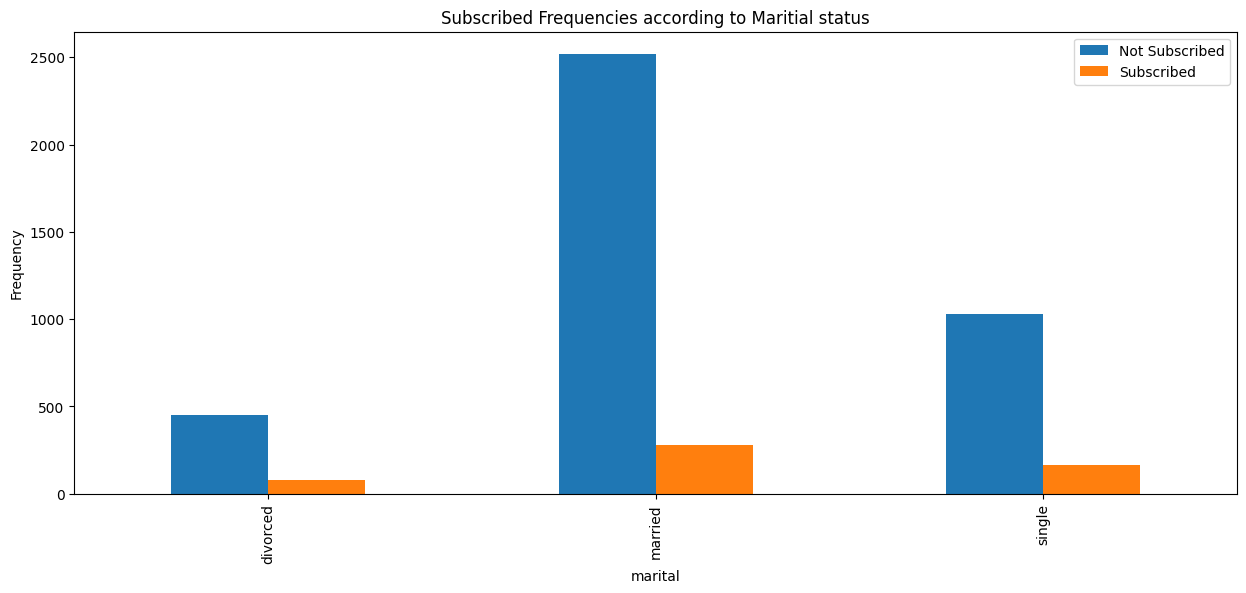

In [ ]:
# crosstab-marital
ct_marital=pd.crosstab(df_copy['marital'],df_copy['y'])
ct_marital.plot(kind="bar",figsize=(15,6))
plt.title('Subscribed Frequencies according to Maritial status')
plt.xlabel('marital')
plt.legend(["Not Subscribed", "Subscribed"])
plt.ylabel('Frequency')
plt.show()

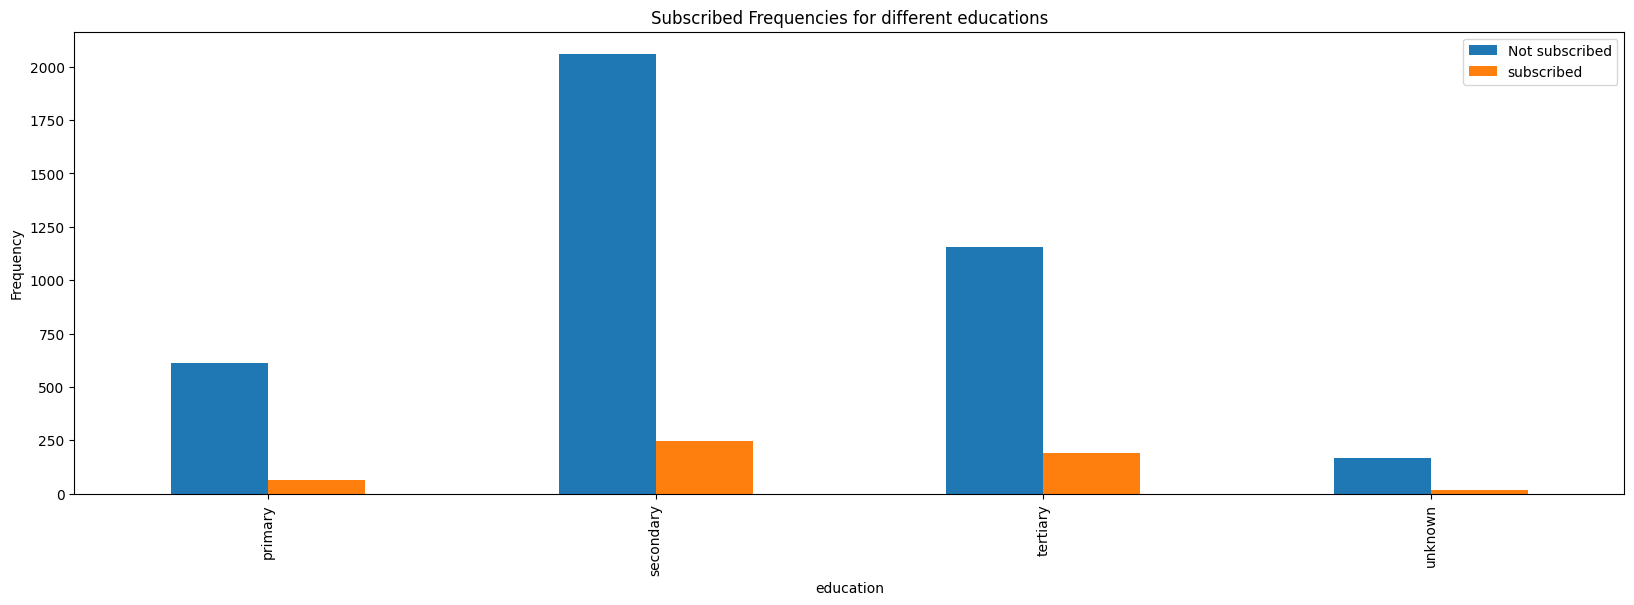

In [ ]:
# crosstab-education
ct_edu=pd.crosstab(df_copy['education'],df_copy['y'])
ct_edu.plot(kind="bar",figsize=(20,6))
plt.title('Subscribed Frequencies for different educations')
plt.legend(["Not subscribed","subscribed"])
plt.xlabel('education')
plt.ylabel('Frequency')
plt.show()

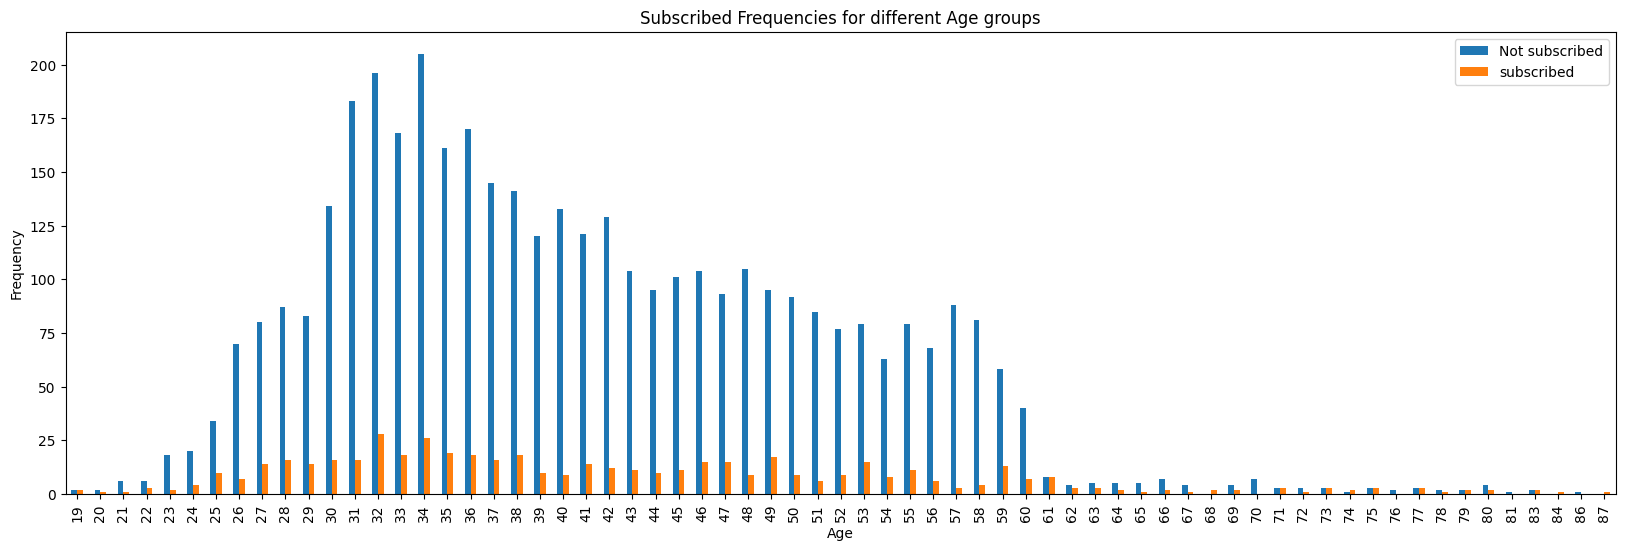

In [ ]:
# crosstab-Age
ct_age=pd.crosstab(df['age'],df['y'])
ct_age.plot(kind="bar",figsize=(20,6))
plt.title('Subscribed Frequencies for different Age groups')
plt.legend(["Not subscribed","subscribed"])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<Axes: >

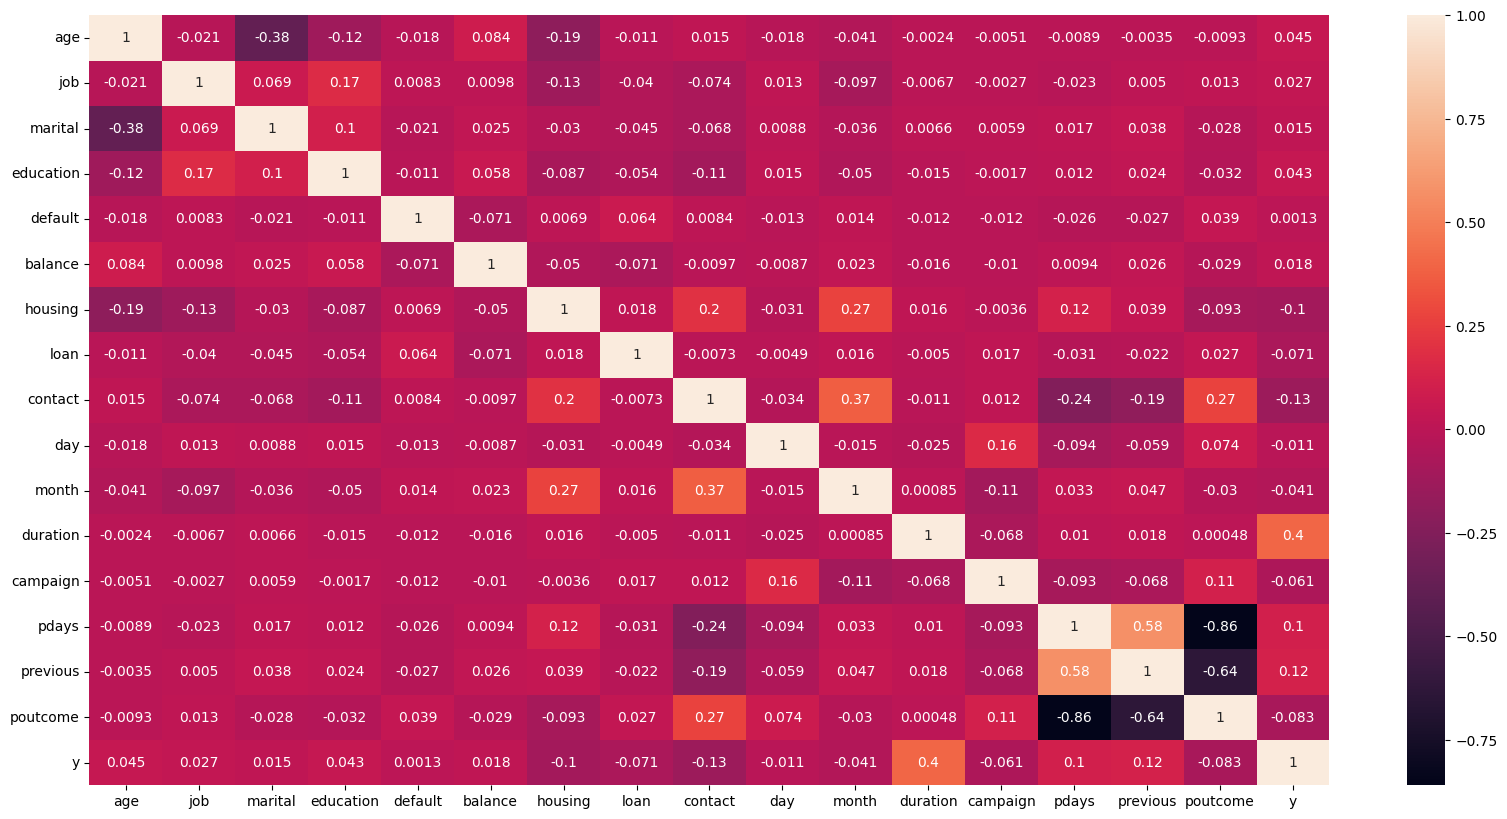

In [ ]:
# heatmap
plt.figure(figsize=(20,10))
sns.heatmap(data=df.corr(),annot=True)

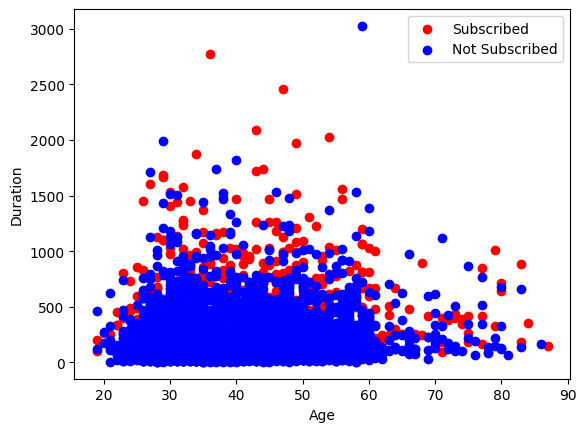

In [ ]:
# scatter plot
plt.scatter(x=df.age[df['y']==1], y=df.duration[(df['y']==1)],c="red")
plt.scatter(x=df.age[df['y']==0], y=df.duration[(df['y']==0)],c="blue")
plt.legend(["Subscribed", "Not Subscribed"])
plt.xlabel("Age")
plt.ylabel("Duration")
plt.show()

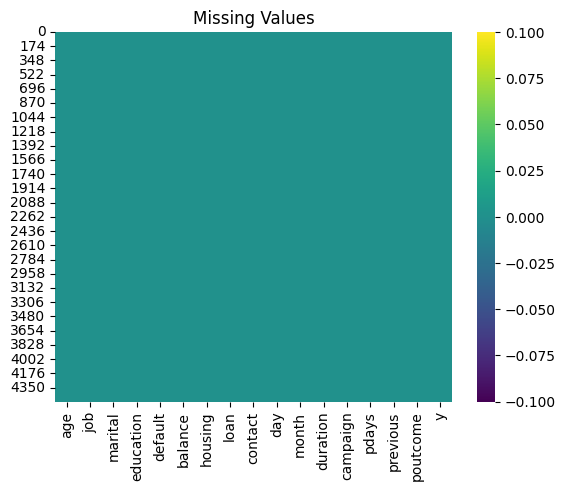

In [ ]:
sns.heatmap(df.isnull(),cmap='viridis')
plt.title('Missing Values')
plt.show()

 **A function that takes a set of predictios and true values** **and that validates the predictions using appropriate metrics**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
def validate_predictions(y_true,y_pred):
  accuracy=accuracy_score(y_true,y_pred)
  precision=precision_score(y_true,y_pred)
  recall=recall_score(y_true,y_pred)
  f1=f1_score(y_true,y_pred)
  roc_auc=roc_auc_score(y_true,y_pred)
  metrics={'accuracy': accuracy,'precision': precision,'recall': recall,'f1_score': f1,'roc_auc': roc_auc}
  return metrics

In [ ]:
y_pred=model.predict(x_test)
y_true=y_test
metrics=validate_predictions(y_true, y_pred)
print("Accuracy:",metrics['accuracy'])
print("Precision:",metrics['precision'])
print("Recall:",metrics['recall'])
print("F1 Score:",metrics['f1_score'])
print("roc_auc:",metrics['roc_auc'])

Accuracy: 0.9060773480662984
Precision: 0.5909090909090909
Recall: 0.27956989247311825
F1 Score: 0.3795620437956204
roc_auc: 0.6287012023941946


**Additional steps to improve the performance**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
num_trees=30
seed=7
kfold=KFold(n_splits=10)
model_1=GradientBoostingClassifier(n_estimators=num_trees)
results=cross_val_score(model_1,x,y,cv=kfold)
print(results.mean())

0.8944939342436852


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
num_trees=30
seed=7
kfold=KFold(n_splits=10)
model_2=AdaBoostClassifier(n_estimators=num_trees)
results=cross_val_score(model_2,x, y,cv=kfold)
print(results.mean())

0.8951630233057883
